In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("diabetes_csv.csv")
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


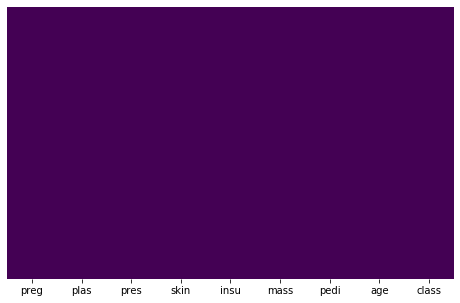

In [3]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

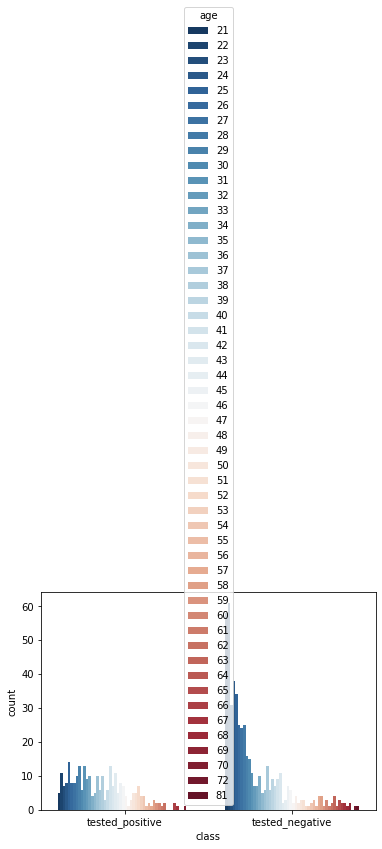

In [4]:
sns.countplot(x='class',data=df, hue='age', palette='RdBu_r')

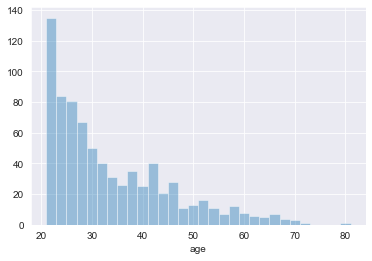

In [5]:
sns.set_style('darkgrid')

sns.distplot(df['age'].dropna(),kde=False, bins=30)

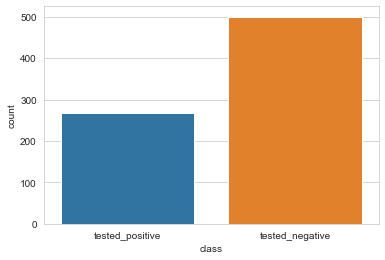

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='class', data=df)

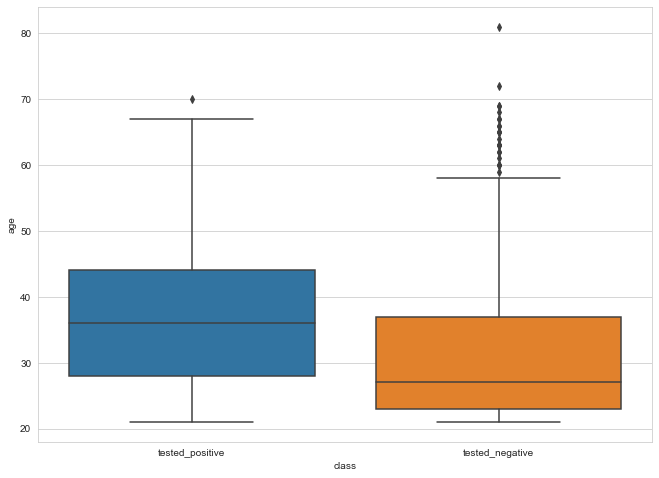

In [7]:
sns.set_style('whitegrid')
plt.figure(figsize=(11,8))

sns.boxplot(x='class', y='age', data=df)

In [8]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [9]:
df = df.rename(columns = {"class": "status"}) 

In [10]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,status
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [11]:
stat = pd.get_dummies(df['status'], drop_first=True)
stat.head()

,tested_positive
0,1
1,0
2,1
3,0
4,1


In [12]:
df = pd.concat([df,stat],axis=1)

In [13]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,status,tested_positive
0,6,148,72,35,0,33.6,0.627,50,tested_positive,1
1,1,85,66,29,0,26.6,0.351,31,tested_negative,0
2,8,183,64,0,0,23.3,0.672,32,tested_positive,1
3,1,89,66,23,94,28.1,0.167,21,tested_negative,0
4,0,137,40,35,168,43.1,2.288,33,tested_positive,1


In [14]:
df.drop(['status'], axis=1, inplace = True)

In [15]:
df.columns

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age',
       'tested_positive'],
      dtype='object')

In [16]:
x = df[['preg','plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']]
y = df['tested_positive']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lmodel = LogisticRegression()

In [21]:
lmodel.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
predictions = lmodel.predict(x_test)

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       150
           1       0.76      0.56      0.64        81

    accuracy                           0.78       231
   macro avg       0.78      0.73      0.74       231
weighted avg       0.78      0.78      0.77       231



In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
cm = confusion_matrix(y_test, predictions)
cmatrix = pd.DataFrame(cm, columns=['Predicted:\n Negative', 'Predicted:\n Positive'], index=['Actual: Negative', 'Actual: Positive'])
cmatrix

,Predicted: Negative,Predicted: Positive
Actual: Negative,136,14
Actual: Positive,36,45


# K Nearest Neighbors Algorithm

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
scaler.fit(df.drop('tested_positive',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
scaled_features = scaler.transform(df.drop('tested_positive',axis=1))

In [31]:
df_feat = pd.DataFrame(scaled_features,columns=['preg','plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'])
df_feat.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [32]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['tested_positive'], test_size=0.30)

In [33]:
#Using KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [34]:
pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[115  34]
 [ 37  45]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       149
           1       0.57      0.55      0.56        82

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



In [35]:
# Choosing a K Value for getting the best accuracy
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

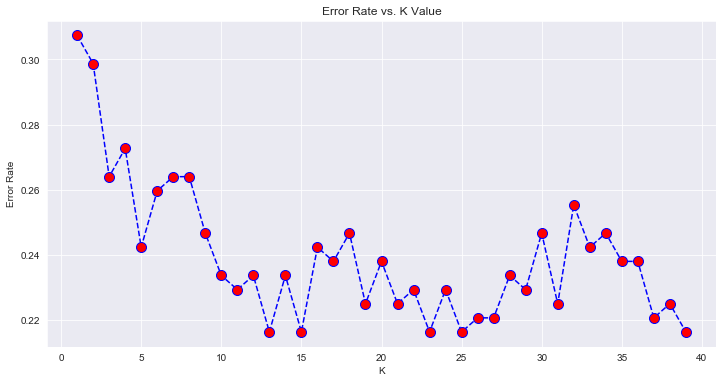

In [36]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')

plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [37]:
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[128  21]
 [ 35  47]]


              precision    recall  f1-score   support

           0       0.79      0.86      0.82       149
           1       0.69      0.57      0.63        82

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.72       231
weighted avg       0.75      0.76      0.75       231



# SVM

In [38]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

In [39]:
y_pred = classifier.predict(x_test)

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.645021645021645


In [44]:
from sklearn import metrics
print("Precision:",metrics.precision_score(y_test,pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test,pred))

Precision: 0.6911764705882353
Recall: 0.573170731707317


In [55]:
auc = roc_auc_score(y_test,pred)
print('AUC: %.2f' % auc)

AUC: 0.72
